### Сборный проект
___
**Описание проекта:**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков»
___
**Цель исследования:**

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
___
**Задачи исследования**
- [Открыть файл с данными и изучим датасет](#section1)


- [Сделать предобработку](#section2)
  - [Переведем названия столбцов к нижнему регистру](#section3)
  - [Обработаем пропуски при необходимости](#section5)
  - [Посчитать суммарные продажи во всех регионах и внести их в отдельный столбец](#section6)
 
 
- [Исследовательский анализ данных](#section7)
  - [Посмотреть количество выпущенных игр в разные годы](#section8)
  - [Посмотреть, как менялись продажи по платформам](#section9)
  - [Выберать платформы с наибольшими суммарными продажами и построить распределение по годам](#section10)
  - [Узнать за какой характерный срок появляются новые и исчезают старые платформы](#section11)
  - [Определить актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год](#section12)
  - [Выберите несколько потенциально прибыльных платформ](#section13)
  - [Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам](#section14)
  - [Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков](#section15)
  - [Посмотрите на общее распределение игр по жанрам](#section16)
 
 
- [Определить для пользователя каждого региона (NA, EU, JP)](#section33):
  - [Самые популярные платформы (топ-5)](#section17)
  - [Самые популярные жанры (топ-5)](#section18)
  - [Влияние рейтинга ESRB на продажи в отдельном регионе](#section19)
 

- [Проверить гипотезы](#section44):
  - [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#section20)
  - [Средние пользовательские рейтинги жанров Action и Sports разные](#section21)


- [Написать общий вывод](#section22)
___
**Исходные данные**

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

<a name="section1"></a>
### Откройте файл с данными и изучите общую информацию. 

In [1]:
#Импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [3]:
try:
    data = pd.read_csv('games.csv', sep=',')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv', sep=',')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
pd.set_option('display.max_columns', None)

data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Датасет содержит 16715 строк и 11 столбцов. Более детально ознакомимся с данными на этапе предобработки

<a name="section2"></a>
### Предобработка данных

<a name="section3"></a>
#### Приведем имена столбоцов к нижнему регистру

In [6]:
data.columns = data.columns.str.lower()

data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<a name="section4"></a>

#### Поиск дубликатов

In [7]:
data.duplicated().sum()

0

Полные дубликаты отсутствуют. Попробуем найти неявные дубликаты.

In [8]:
for col in data.columns:
    duplicates = data[col].duplicated().sum()
    if duplicates > 0:
        print(f"Столбец {col} содержит {duplicates} дубликатов")
    else:
        print(f"Столбец {col} не содержит дубликатов")

Столбец name содержит 5155 дубликатов
Столбец platform содержит 16684 дубликатов
Столбец year_of_release содержит 16677 дубликатов
Столбец genre содержит 16702 дубликатов
Столбец na_sales содержит 16313 дубликатов
Столбец eu_sales содержит 16408 дубликатов
Столбец jp_sales содержит 16471 дубликатов
Столбец other_sales содержит 16560 дубликатов
Столбец critic_score содержит 16632 дубликатов
Столбец user_score содержит 16618 дубликатов
Столбец rating содержит 16706 дубликатов


Платформ, годов релиза и жанров не так чтобы и много, поэтому дубликаты в данных столбцах логичны. Наличие одинаковых значений в числовых столбцах (продажи, оценки) также неудивительны. Дубликаты в `name` вызывают интерес разобраться с ними.

Проверим гипотезу о наличии в датасете одной и той же игры, но для разных платформ.

In [9]:
(
    data
    .groupby('name')['platform']
    .nunique()
    .sort_values(ascending=False)
    .head()
)

name
Need for Speed: Most Wanted    10
Ratatouille                     9
Madden NFL 07                   9
LEGO Marvel Super Heroes        9
FIFA 14                         9
Name: platform, dtype: int64

Усовершенствуем группировку, т.к. игра могла издаваться для разных платформ в разные года. Тем более под названием "Need for Speed: Most Wanted" выпускались две разные игры.

In [10]:
(
    data
    .query('name=="Need for Speed: Most Wanted"')
    .year_of_release
    .unique()
)

array([2005., 2012., 2013.])

Собственно это и наблюдаем на примере гоночной игры.
___
Включим в группировку год релиза

In [11]:
(
    data
    .groupby(['name','year_of_release'])['platform']
    .nunique()
    .sort_values(ascending=False)
    .head()
)

name                          year_of_release
Ratatouille                   2007.0             9
FIFA 14                       2013.0             9
LEGO Marvel Super Heroes      2013.0             9
The LEGO Movie Videogame      2014.0             8
Lego Batman 3: Beyond Gotham  2014.0             8
Name: platform, dtype: int64

**9** - число платформ. Т.к. дубликаты - это игры, выпущенные на разные платформы, то обрабатывать их нет смысла.

#### Работа со столбцами

<a name="section5"></a>
##### Пропуски 

###### Столбец `name`

In [12]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Имеется пара пропусков в столбце `name`.Также отсутствуют жанр на этих позициях, оценки и рейтинг. Имеются различия в продажах: `659` "индекс" больше продается в США и Европе, `14244` - в Японии. Единственное, что их объединяет - платформа GEN. Гипотеза: пропусками могут являться сиквелы/триквелы. Посмотрим на игры, изданные на GEN, отсортировав их по имени.

In [13]:
data.query('platform =="GEN"').sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14132,Castlevania Bloodlines,GEN,1994.0,Platform,0.00,0.00,0.04,0.00,NaN,NaN,NaN
1365,Disney's The Lion King,GEN,1994.0,Platform,0.97,0.37,0.03,0.05,NaN,NaN,NaN
11660,Dragon Slayer: The Legend of Heroes,GEN,1994.0,Role-Playing,0.00,0.00,0.08,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
9787,Ecco the Dolphin,GEN,1992.0,Adventure,0.00,0.00,0.12,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
9563,Gunstar Heroes,GEN,1992.0,Shooter,0.00,0.00,0.13,0.00,NaN,NaN,NaN
14085,J-League Pro Striker 2,GEN,1994.0,Sports,0.00,0.00,0.04,0.00,NaN,NaN,NaN
9000,"Lunar 2: Eternal Blue(sales, but wrong system)",GEN,1994.0,Role-Playing,0.00,0.00,0.14,0.00,NaN,NaN,NaN


Отсутствуют сиквелы Mortal Kombat и Streets of Rage. Рассмотрим эти франшизы только на платформе GEN и сравним с пропусками.

In [14]:
#используем заглушку для корректной работы
data['name'] = data['name'].fillna('unknown')

(
    data[data['name']
         .str.contains('Mortal|Streets|unknown')]
    .query('platform == "GEN"')
    .sort_values(by='year_of_release')
)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
588,Streets of Rage,GEN,1990.0,Action,1.86,0.55,0.11,0.08,NaN,NaN,NaN
564,Mortal Kombat,GEN,1992.0,Fighting,1.95,0.63,0.00,0.09,NaN,NaN,NaN
659,unknown,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
14244,unknown,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
1453,Mortal Kombat 3,GEN,1994.0,Fighting,1.03,0.27,0.00,0.04,NaN,NaN,NaN


MK и MK3 не продавалась в Японии. Первая Streets of Rage продавалась во всех регоионах, в отличии от третьей - та реализовывалась только в Японии.

Итого, индекс `659` - это Mortal Kombat 2: игра распространялась везде, кроме Японии, и имеет схожие показатели относительно первой и третьей частей по продажам. `14244` - скорее всего Streets of Rage 2 (продажи только в Японии и довольно слабые, как и у триквела). А еще подсказал интернет, что эта игра была выпущена в 1993.

В столбцах `name` и `genre` вероятная причина пропусков - невнимательность человека или ошибки при передачи информации.

In [15]:
data.loc[659, ['name', 'genre']] = ['Mortal Kombat 2', 'Fighting']
data.loc[14244, ['name', 'genre']] = ['Streets of Rage 2', 'Action']
data.loc[[659, 14244]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Mortal Kombat 2,GEN,1993.0,Fighting,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,Streets of Rage 2,GEN,1993.0,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN


###### Столбец `year_of_release`

In [16]:
data.query('year_of_release.isna()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [17]:
data.query('year_of_release.isna()').shape[0]

269

Какой то логичной величины, которой можно было бы заполнить пропуски в столбце, нет. Пропусков примерно 2%, их удаление навряд ли как-то глобально повлияют на исследования.

In [18]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

data['year_of_release'] = data['year_of_release'].astype('int')

###### Столбцы `critic_score`, `user_score`

Построим диаграмму количества игр, имеющих оценки и рейтинг, по годам

In [19]:
sns.set_style("darkgrid")

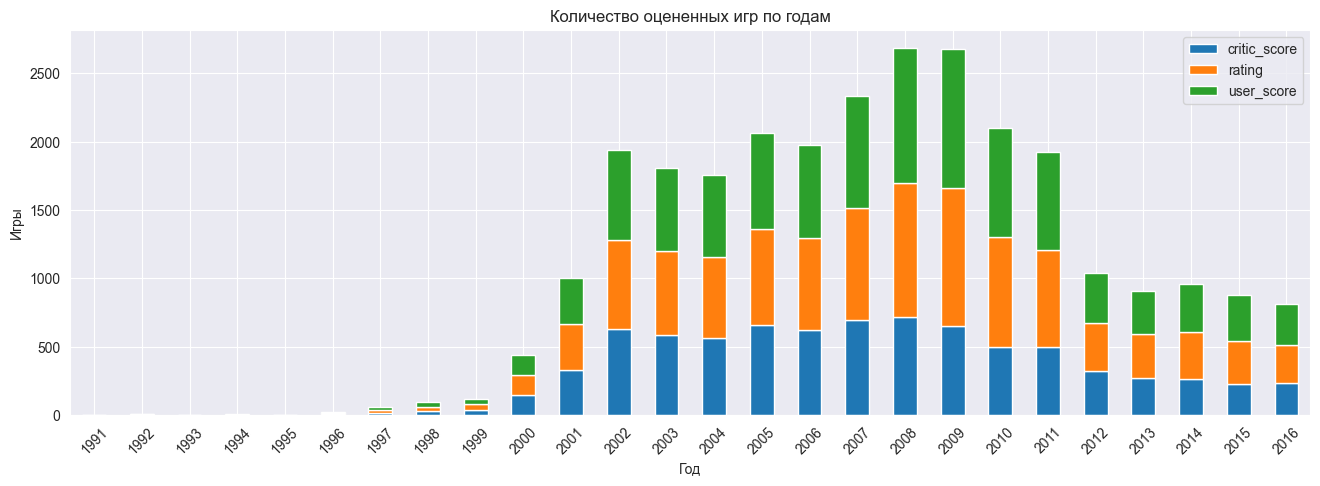

In [20]:
(
    data
    .query('year_of_release > 1990')
    .pivot_table(
        index='year_of_release',
        values=['critic_score', 'user_score', 'rating'],
        aggfunc='count')
    .sort_index(ascending=True)
    .plot(kind='bar',
          figsize=(16,5),
          stacked=True, 
         )
)

plt.title('Количество оцененных игр по годам')
plt.ylabel('Игры')
plt.xlabel('Год')
plt.xticks(rotation=45)
plt.show()

Рассмотрим уникальные значения в critic_score, user_score, rating

In [21]:
data.critic_score.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [22]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Во всех имеется столбцах `nan`. Это обосновать можно тем, что не каждая игра удостаивается оценки от профильных СМИ и игроков. Менять их на какое-либо значение смысла нет - могут исказиться итоги исследования. И данные пустоты навряд ли повлияют на итоги.
___
В `user_score` попадается значение `tbd` - "To Be Determined", или "Будет определено".  Т.к. оценки на момент исследования нет, то правильнее всего заменить `tbd` на пропуск. Но перед этим можно проверить актуальность данных, с которыми работаем.

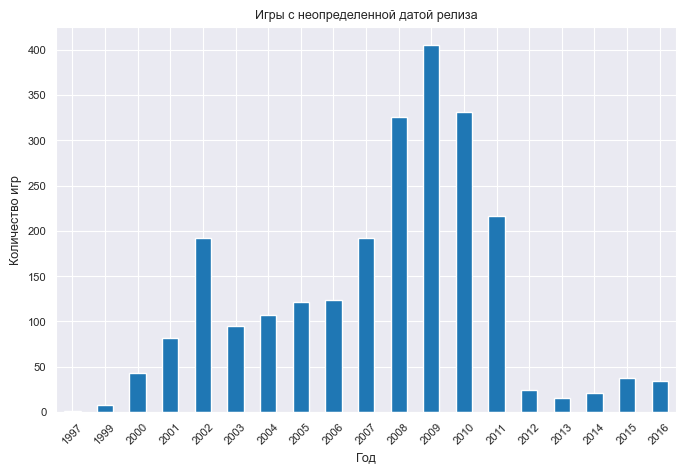

In [23]:
(
    data.query('user_score == "tbd"')['year_of_release']
    .value_counts()
    .sort_index()
    .plot(kind='bar',
          figsize=(8,5),
          fontsize=8)
)

plt.title('Игры с неопределенной датой релиза', fontsize=9)
plt.ylabel('Количество игр', fontsize=9)
plt.xlabel('Год', fontsize=9)
plt.xticks(rotation=45)
plt.show()

In [24]:
data.user_score = data.user_score.replace('tbd', np.NaN).astype('float')

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

То, что ты в 'critic_score' и 'user_score' (после обращения tbd в NaN) оставляешь NaN'ы без обработки - значительно упростит тебе жизнь дальше. В этом проекте - это верное решение.</div>

###### Столбец `rating`

In [25]:
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Расшифровка возрастного рейтинга ESRB:
- **E** - Для всех
- **M** - Для взрослых
- **T** - Подросткам
- **E10+** - Для всех от 10 лет и старше
- **K-A** - Для всех (в 1998 заменен на **Е**)
- **AO** - Только для взрослых
- **EC** - Для детей младшего возраста
- **RP** - Рейтинг ожидается

Проведем замену старого знака рейтинга `K-A` на актуальный `Е`

In [26]:
data['rating'] = data['rating'].replace('K-A', 'E')

Посмотрим на количество пропусков

In [27]:
data['rating'].isna().sum()

6678

Возрастное агенство американское, поэтому стоит стоит проверить гипотезу об отсутствии рейтинга у неамериканских игр.

In [28]:
print('Количество игр без продаж в Северной Америке и без рейтинга:',
      data.query('na_sales == 0 & rating.isna()').shape[0])
print('Доля таких игр от всех безрейтинговых:',
      round(data.query('na_sales == 0 & rating.isna()').shape[0] / 
            data['rating'].isna().sum(),2))

Количество игр без продаж в Северной Америке и без рейтинга: 3689
Доля таких игр от всех безрейтинговых: 0.55


Больше половины таких игр без рейтинга не продавались на территории США.

Так как мы потом будет сформировывать портрет пользователя каждого региона в контексте влияния возрастного рейтинга на продажи, то следует заполнить пропуски условной заглушкой - это поможет избежать неправильных выводов.

In [29]:
data['rating'] = data['rating'].fillna('unknown')

**Вывод:**
- Судя по описанию, данные были взяты из *открытых источников (!)* . Скорее всего не все подобные источники содержали такую информацию, как оценки и год выхода, об игре, следовательно в наших данных столько пропусков. И непонятно когда именно эти данные начали собираться (вполне вероятно, информация могла обновляться, т.к. диаграмма выше позволяет говорить об неактульности некоторых сведений об играх). 
- Банально не все игры становятся объектом интереса для игроков и прессы: если до 00-ых индустрия только зарождалась и не было сервисов а-ля Метакритик по сбору оценок и мнений (не у всех интернет был даже), то в 21 веке по мере роста некоторые игры оставались без внимания ввиду высокой конкуренции и все большей заполненности рынка.
- В дальнейшем надо будет узнать об влиянии на продажи возрастных рейтингов, поэтому, чтобы ничего не потерять, я поменял пропуски на заглушку в виде 'unknown'
- Т.к. в датасете указан рейтинг американского агенства, а наши данные охватывают не только Северную Америку, следовательно имеем много пропусков, т.к. не учитывались рейтинги других региональных агенств.
- Пропуски в `critic_score` и `user_score` остаются нетронутыми: их заполнение может привести к неверным выводам.

<a name="section6"></a>
##### Добавим столбец суммарных продаж

In [30]:
data['total_sales'] = (
    data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
    .sum(axis=1))

In [31]:
data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head()

,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,41.36,28.96,3.77,8.45,82.54
1,29.08,3.58,6.81,0.77,40.24
2,15.68,12.76,3.79,3.29,35.52
3,15.61,10.93,3.28,2.95,32.77
4,11.27,8.89,10.22,1.00,31.38


***Вывод:***
- Ознакомились со столбцами, содержащие пропуски
- Присвоили 0 пустотам в year_of_release, чтобы поменять тип столбца на int - на графиках и диаграммах целочисленные годы выглядят опрятнее
- Добавили новый столбец total_sales, суммировав в нем все продажи игры.
- Удалены их датасета пропущенные значения в столбцах name и genre.

<a name="section7"></a>
### Исследовательский анализ данных

<a name="section8"></a>
#### Игры по годам

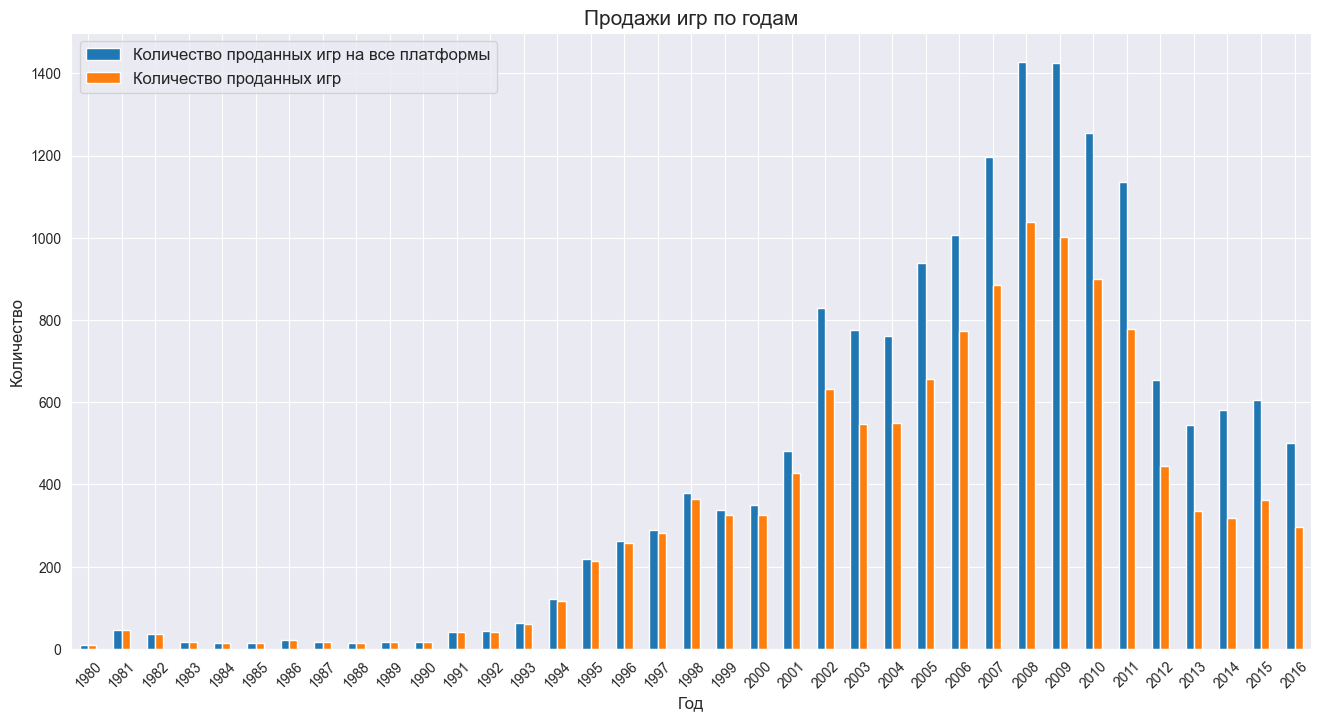

In [32]:
year_data = pd.concat(
    [
        data
        .pivot_table(
            index='year_of_release',
            values='name',
            aggfunc='count'),
        data
        .pivot_table(
            index='year_of_release', 
            values='name', 
            aggfunc='nunique')
    ], axis=1)

year_data.columns = ['Количество проданных игр на все платформы', 'Количество проданных игр']

# Строим график
year_data.plot(kind='bar', figsize=(16,8), fontsize=10)
plt.title('Продажи игр по годам', fontsize=15)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='best', fontsize=12)
plt.show()


В 80-х индустрия геймдева была очень нишевой, которая еще и пережила кризис 1983 года. Планомерное развитие начинается в 90-ые и достигает своего пика в 2008-2009 гг. Затем происходит дальнейший спад из-за развития мобильного гейминга: рынок стали наполнять смартфоны с iOS и Android.

<a name="section9"></a>
#### Продажи по платформам

Посмотрим суммарные продажи по платформам

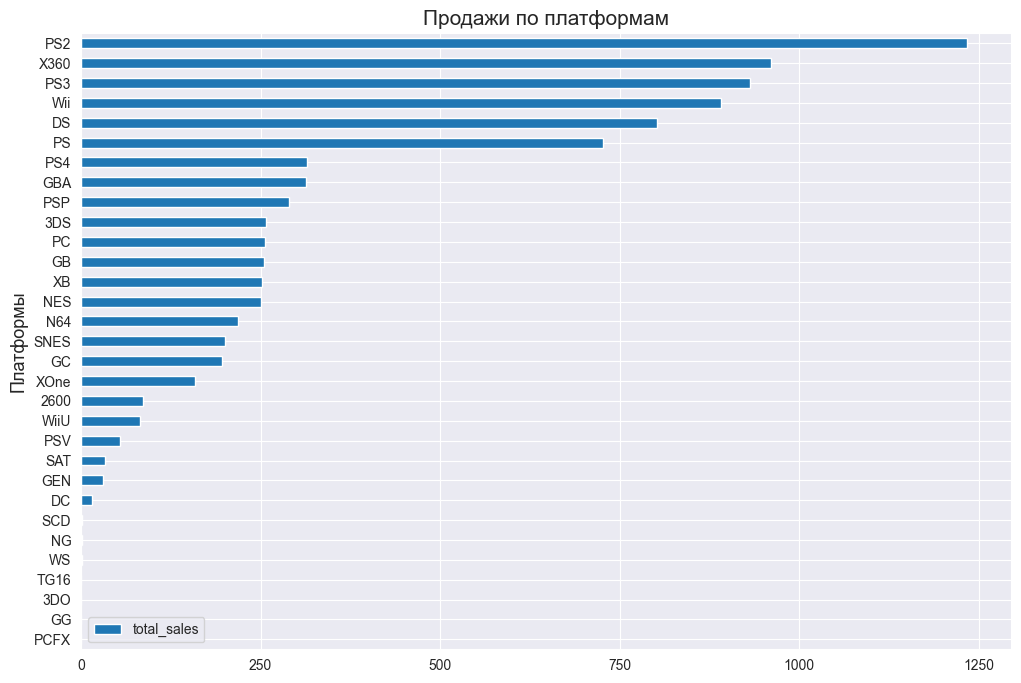

In [33]:
(
    data.pivot_table(
        index='platform',
        values='total_sales',
        aggfunc='sum')
    .sort_values(
        by='total_sales',
        ascending=True)
    .plot(kind='barh',
       figsize=(12,8),
       xticks=range(0,1500,250),
       grid=True
      )
)

plt.title('Продажи по платформам', fontsize=15)
plt.ylabel('Платформы', fontsize=13)
#plt.xlabel('Продажи по платформам', fontsize=13)
plt.show()

Посмотрим долю платформ по годам.

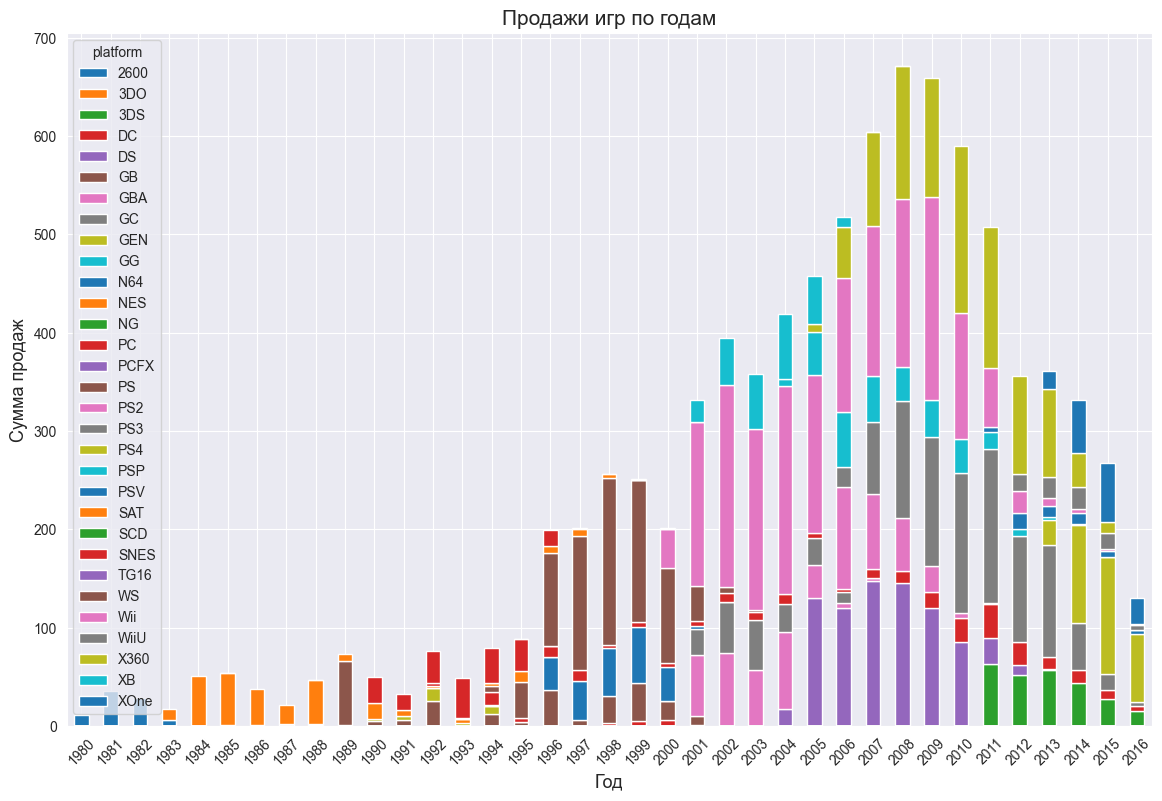

In [34]:
(
    data
    .pivot_table(index='year_of_release',
                     columns='platform',
                     values='total_sales',
                     aggfunc='sum')
    .plot(
        kind='bar',
        stacked=True,
        figsize=(14, 9),
        fontsize=10
    )
)

plt.title('Продажи игр по годам', fontsize=15)
plt.ylabel('Сумма продаж', fontsize=13)
plt.xlabel('Год', fontsize=13)
plt.xticks(rotation=45)
plt.show()

<a name="section10"></a>
График получился шумным, сложно сделать какие-либо выводы. Для обобщенных выводов хватит и топ-6 платформ по продажам.

In [35]:
#создадим датафрейм с самыми продаваемыми платформами
top_platform_sales = (
    data
    .pivot_table(
        index='platform',
        values='total_sales',
        aggfunc='sum')
    .sort_values(
        by='total_sales',
        ascending=False)
    .head(6))

top_platform_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


In [36]:
#создадим список с наименованиями платформ
top_6_platform = (
    top_platform_sales
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
    .platform
    .to_list()
)

top_6_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

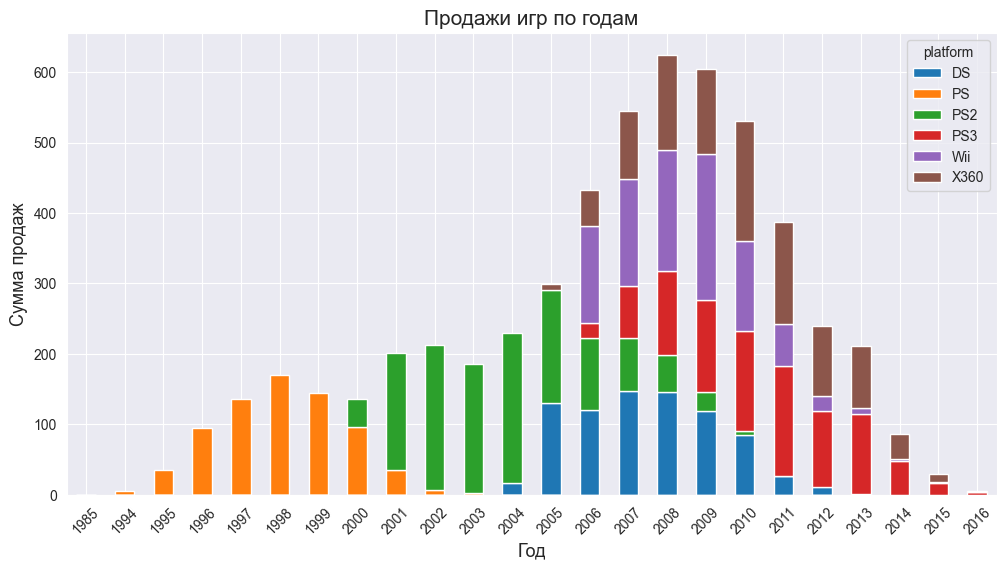

In [37]:
(
    data.query('platform in @top_6_platform')
    .pivot_table(index='year_of_release',
                     columns='platform',
                     values='total_sales',
                     aggfunc='sum')
    
    .plot(
        kind='bar',
        stacked=True,
        figsize=(12, 6),
        fontsize=10
    )
)

plt.title('Продажи игр по годам', fontsize=15)
plt.ylabel('Сумма продаж', fontsize=13)
plt.xlabel('Год', fontsize=13)
plt.xticks(rotation=45)
plt.show()

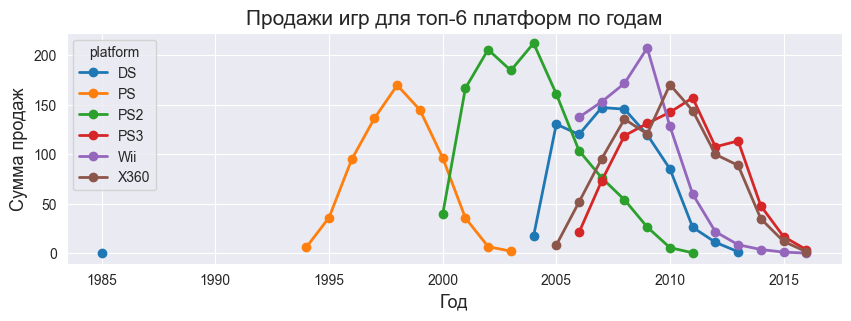

In [38]:
(
    data.query('platform in @top_6_platform & year_of_release > 0')
    .pivot_table(index='year_of_release',
                columns='platform', 
                values='total_sales', 
                aggfunc='sum')
    .plot(
        style='o-',
        grid= True,
        legend=True,
        figsize=(10,3),
        linewidth=2
    )
)

plt.title('Продажи игр для топ-6 платформ по годам', fontsize=15)
plt.xlabel('Год', fontsize=13)
plt.ylabel('Сумма продаж', fontsize=13)
plt.show()

На графике отобразился артефакт - релиз игр для платформы DS в 1985. Хотя продажи самой платформы начались в 2004.

In [39]:
data.query('platform == "DS" & year_of_release < 2000')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15706,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02


На лицо явная ошибка - релиз игры состоялся в 2007. Стоит обновить соответствующую ячейку.

In [40]:
data.loc[15706, 'year_of_release'] = 2007

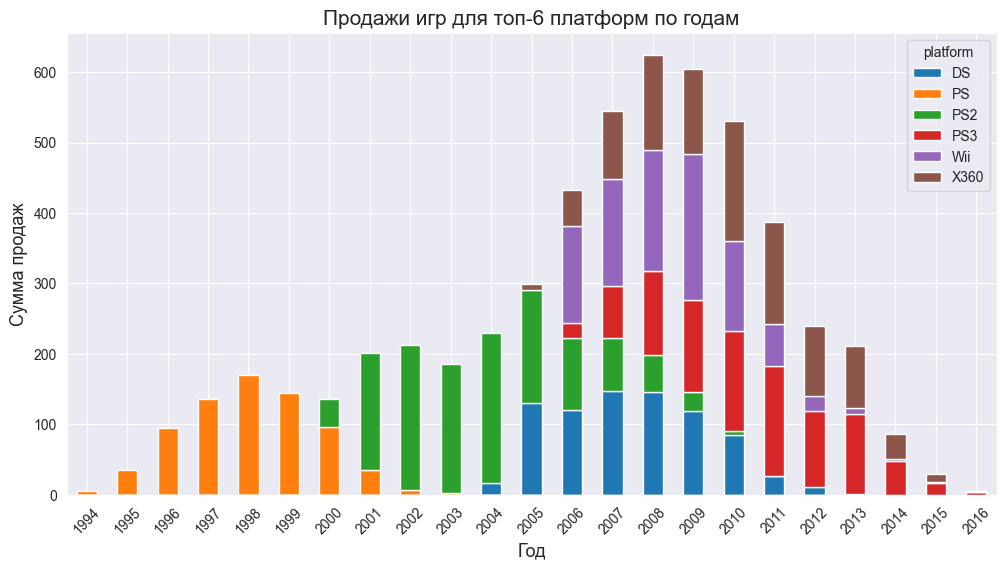

In [41]:
(
    data
    .query('platform in @top_6_platform & year_of_release > 0')
    .pivot_table(index='year_of_release',
                     columns='platform',
                     values='total_sales',
                     aggfunc='sum')
    .plot(
        kind='bar',
        stacked=True,
        figsize=(12, 6)
    )
)

plt.title('Продажи игр для топ-6 платформ по годам', fontsize=15)
plt.ylabel('Сумма продаж', fontsize=13)
plt.xlabel('Год', fontsize=13)
plt.xticks(rotation=45)
plt.show()

<a name="section11"></a>
Срок жизни платформы

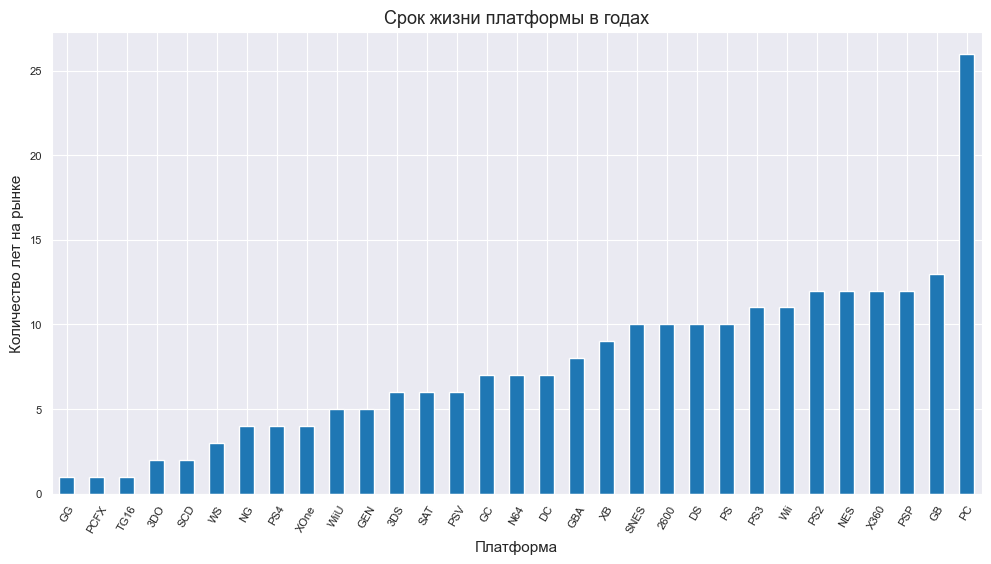

Средний срок жизни платформы на рынке: 7.6 лет


In [42]:
ltv_platform = (
    data
    .query('year_of_release > 0')
    .pivot_table(index='platform',
                     columns='year_of_release',
                     values='total_sales',
                     aggfunc='count')
)

ltv_platform['total'] = (ltv_platform > 0).sum(axis=1) #сколько лет на рынке присутствовала платформа

ltv_platform['total'].sort_values(ascending=True).plot(
        kind='bar',
        grid=True,
        figsize=(12,6),
        fontsize=8)

plt.title('Срок жизни платформы в годах', fontsize=13)
plt.ylabel('Количество лет на рынке', fontsize=11)
plt.xlabel('Платформа', fontsize=11)
plt.xticks(rotation=60)
plt.show()



print('Средний срок жизни платформы на рынке:', round(ltv_platform['total'].mean(), 1), 'лет')

***Вывод:***
- PC самая долгоиграющая платформа - с разной периодичностью продажи игр на нее длятся вот уже 25 лет
- Больше всего проданных копий игр приходится на PS2 - 1255 млн.
- Средний срок жизни игровой платформы на рынке составляет около 8 лет.

<a name="section12"></a>
#### Определение актуального периода

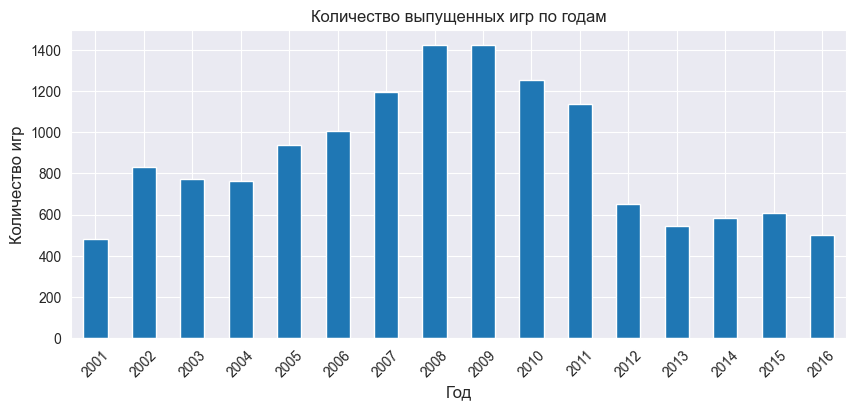

In [43]:
(
    data.query('year_of_release > 2000')['year_of_release']
    .value_counts()
    .sort_index(ascending=True)
    .plot(kind='bar', figsize=(10,4))
)


plt.title('Количество выпущенных игр по годам', fontsize=12)
plt.ylabel('Количество игр', fontsize=12)
plt.xlabel('Год', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Возьмем период 2013-2016 гг - именно в это время рынок престал падать и плюс-минус "устаканился"

In [44]:
df_actual = data.query('year_of_release >= 2013').reset_index(drop=True)
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


<a name="section13"></a>
#### Какие платформы лидируют по продажам, растут или падают

Определим список платформ, которые дожили до последнего, 2016 года, в отчете

In [45]:
platforms = df_actual.query('year_of_release == 2016')['platform'].unique().tolist()
platforms

['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii']

Построим графики продаж по годам

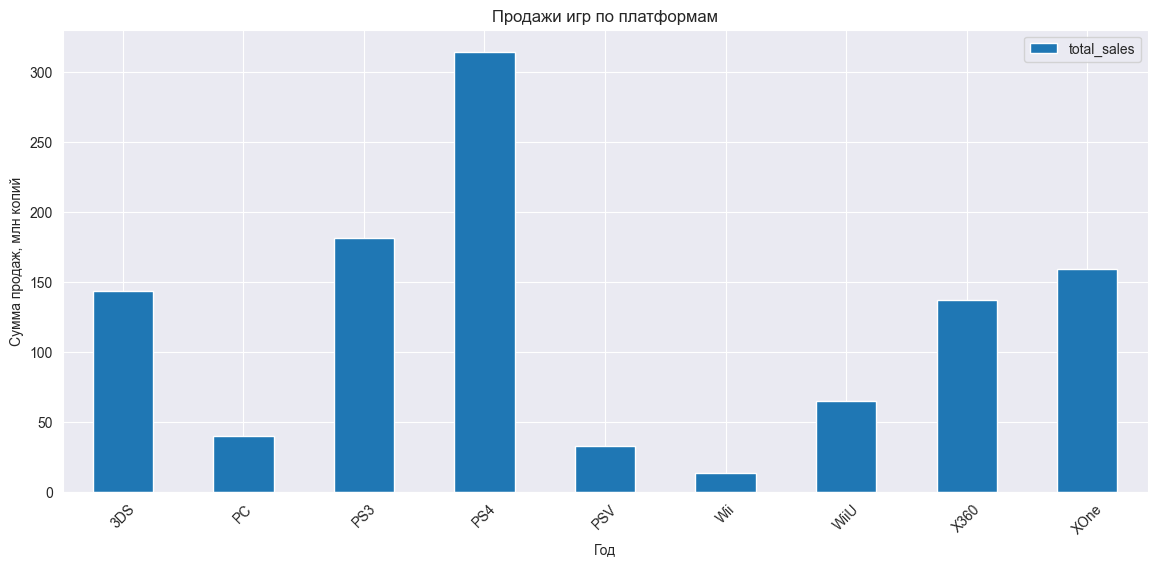

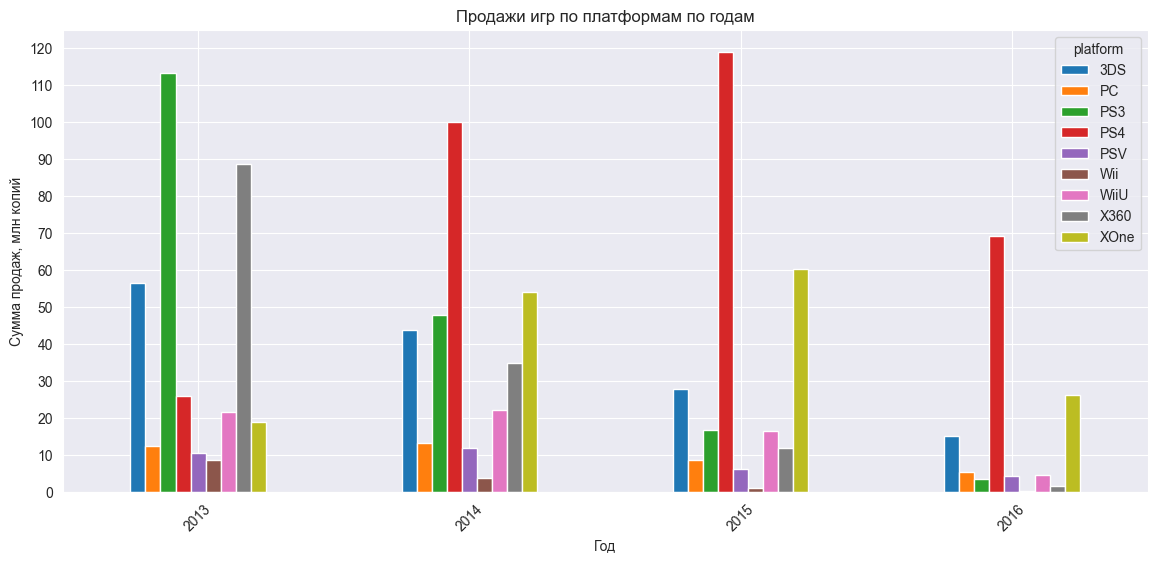

In [46]:
(
    df_actual
    .query('platform in @platforms')
    .pivot_table( 
                      index='platform', 
                      values='total_sales', 
                      aggfunc='sum').plot(kind='bar',
                                          #grid=True,
                                          ylabel='Сумма продаж, млн копий',
                                          xlabel='Год',
                                          title='Продажи игр по платформам',
                                          figsize=(14, 6),
                                          #yticks=range(0,130,10)
                                         )
)

#plt.grid(True, alpha=0.1)
plt.xticks(rotation=45)
plt.show()

#продажи по платформам по годам
(
    df_actual
    .query('platform in @platforms')
    .pivot_table(columns='platform', 
                      index='year_of_release', 
                      values='total_sales', 
                      aggfunc='sum').plot(kind='bar',
                                          #grid=True,
                                          ylabel='Сумма продаж, млн копий',
                                          xlabel='Год',
                                          title='Продажи игр по платформам по годам',
                                          figsize=(14, 6),
                                          yticks=range(0,130,10))
)
plt.xticks(rotation=45)
#plt.grid(True, alpha=0.1)
plt.show()

В выбранном актуальном периоде каждый год лидируют продукты от Sony: в 2013 - PS3, в 2014-2016 - PS4.
___
Построим графики продаж по платформам

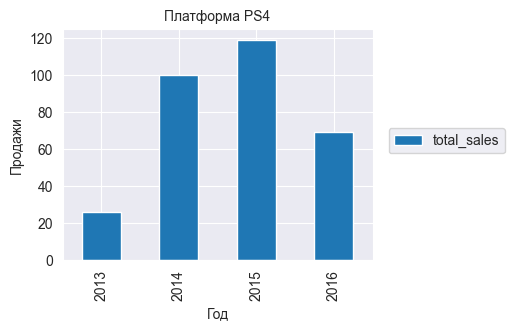

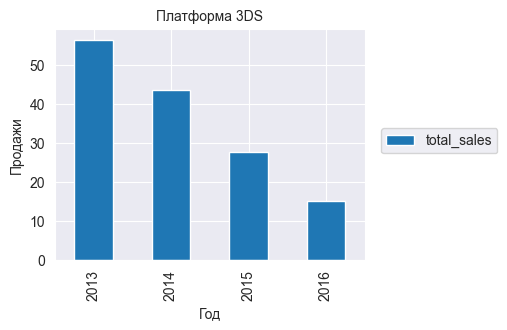

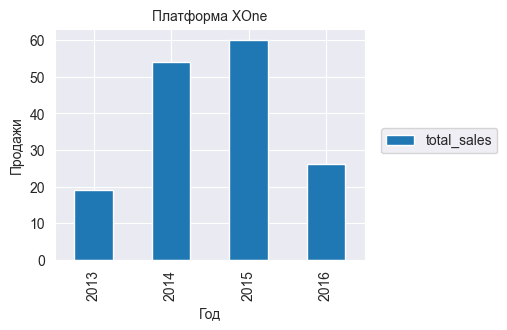

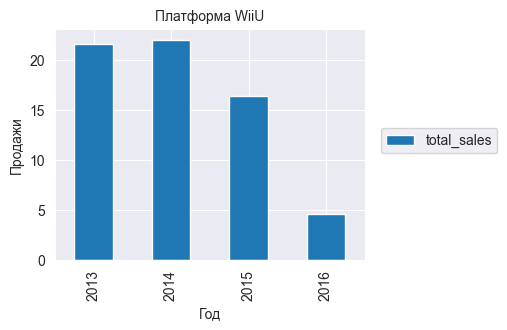

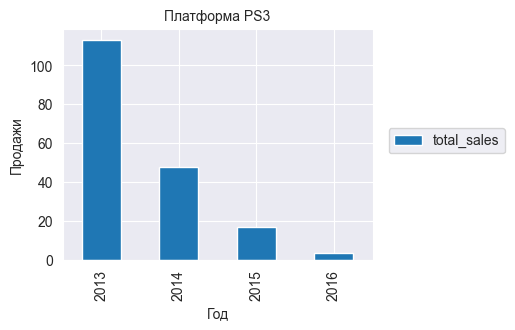

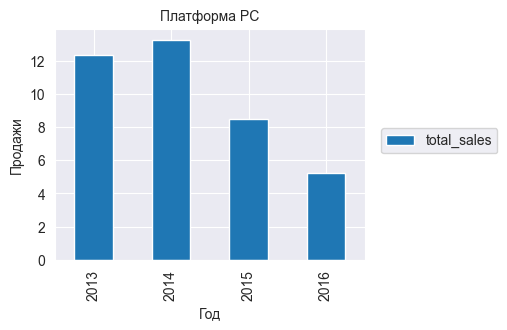

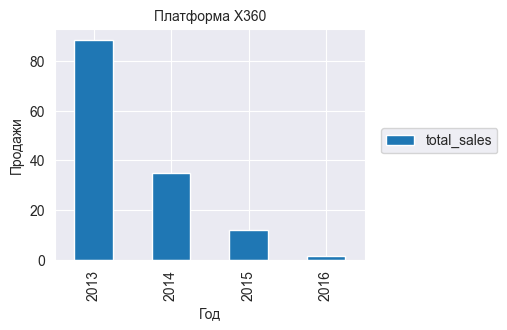

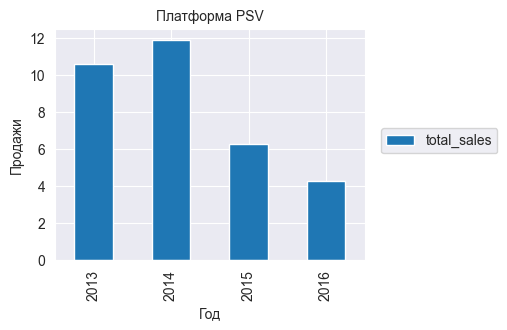

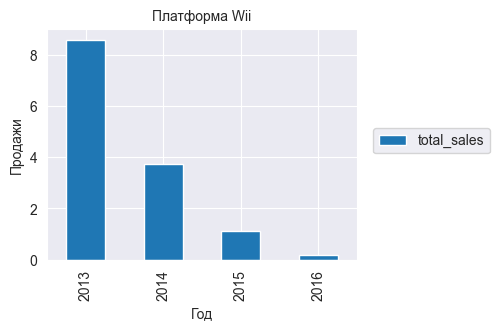

In [47]:
for platform in platforms:
    (
        df_actual[df_actual['platform'] == platform]
        .pivot_table(
            index='year_of_release',
            values='total_sales',
            aggfunc='sum')
        .plot(
            kind='bar',
            figsize=(4, 3)
        )
    )
    
    plt.title('Платформа ' + platform, fontsize=10)
    plt.xlabel('Год')
    plt.ylabel('Продажи')
    plt.legend(loc='upper right', bbox_to_anchor=(1.45, 0.6))

Только две платформы показывают рост за актуальный период (не считая незаконченного 2016-го) - PS4 и Xbox One. Прошлое поколение этих приставок, PS3 и Xbox 360, застали пиковые продажи игр на свои платформы спустя 4-5 лет после релиза. Актуальным версиям максимум 3 года, т.е. восходящий тренд будет продолжаться.

<a name="section14"></a>
#### Ящик с усами

In [48]:
df_actual = df_actual.query('platform in @platforms') # удалил платформы, которые "умерли" в актуальный период

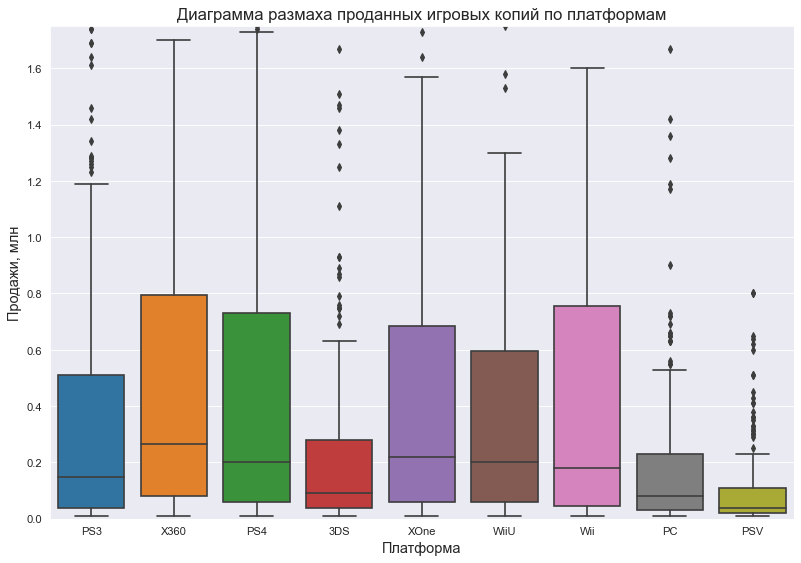

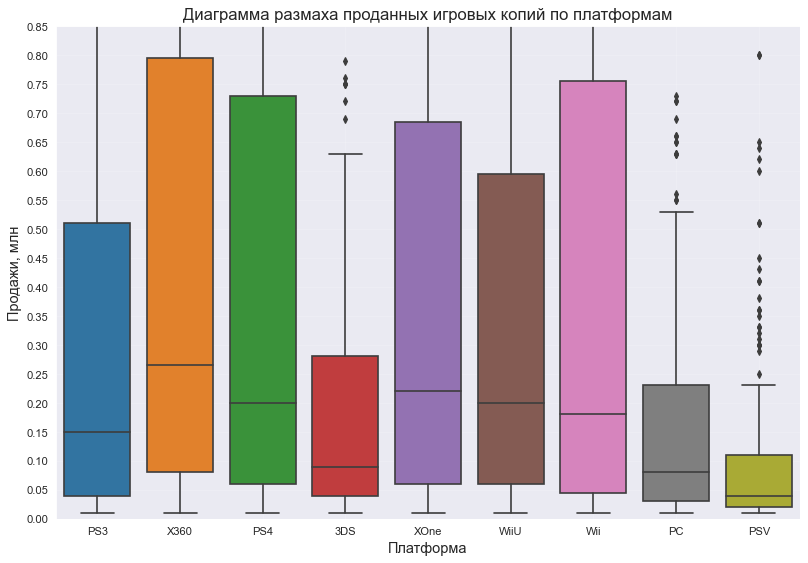

In [49]:
plt.figure(figsize=(12,8), dpi= 80)

sns.boxplot(data=df_actual, x='platform', y='total_sales')

plt.ylim(0, 1.75)
plt.title("Диаграмма размаха проданных игровых копий по платформам", fontsize=15)
plt.xlabel('Платформа', fontsize=13)
plt.ylabel('Продажи, млн', fontsize=13)
plt.show()


#Рассмотрим ящики более детально
plt.figure(figsize=(12,8), dpi= 80)

sns.boxplot(data=df_actual, x='platform', y='total_sales')

plt.grid(True, alpha=0.2)
plt.yticks(np.arange(0, 0.9, 0.05))
plt.ylim(0, 0.85)
plt.title("Диаграмма размаха проданных игровых копий по платформам", fontsize=15)
plt.xlabel('Платформа', fontsize=13)
plt.ylabel('Продажи, млн', fontsize=13)
plt.show()


***Вывод:***
- Wii имеет меньше всего выбросов
- Самые длинные верхние усы у X360, PS4, XOne и Wii
- Чисто визуально, больше всего выбросов у PS4 - наверно много игр очень разной ценовой категории
- X360 имеет самые большие квартили: 1-й - 80 тыс., 2-й - 270, 3-й - около 800. PSV - самые низкие: 25, 40 и 120 тыс. соответственно.
- 1 квартиль у платформ различается незначительно: разница между минимум и максимум доходит до примерно 50 тыс.
- Медианные значения продаж разнятся от платформы к платформе и разница в них доходит до 230 тыс.
- 3 квартиль различается сильнее всего, разница между платформами - около 700 тысяч.
- Wii выделяется: по медианному заработку эта платформа устапет многим, но выручка за 75% продаж позволяет обогнать всех, кроме X360.

<a name="section15"></a>
#### Влияние оценок и критики

Построим диаграммы рассеяния и посчитаем коррелиции Пирсона

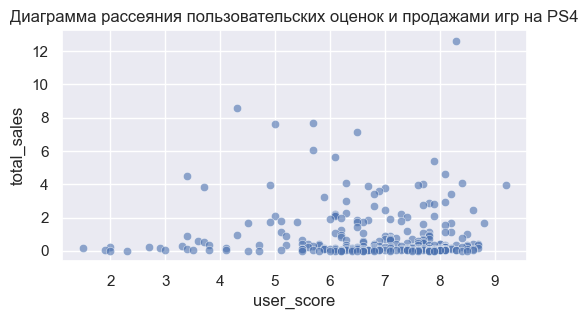

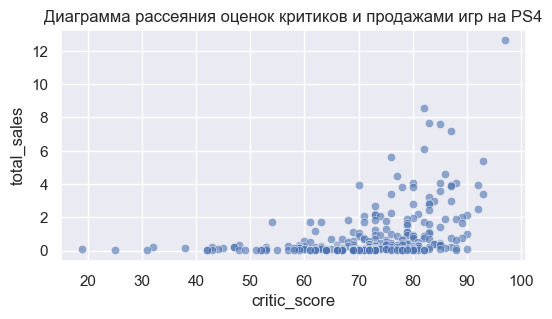

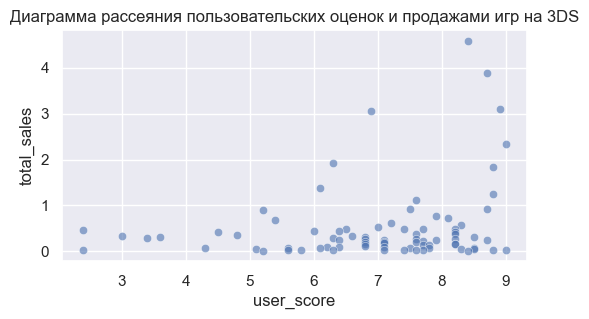

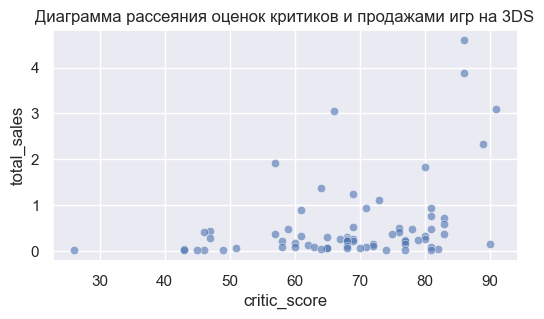

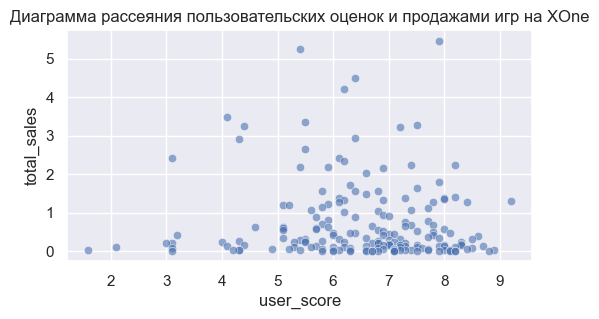

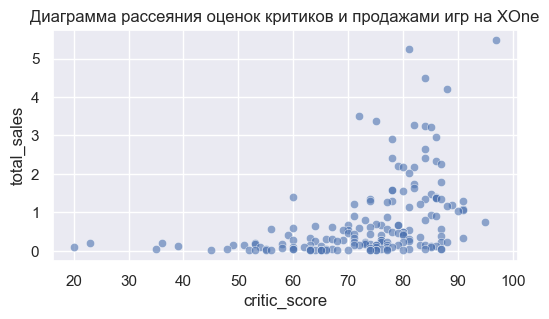

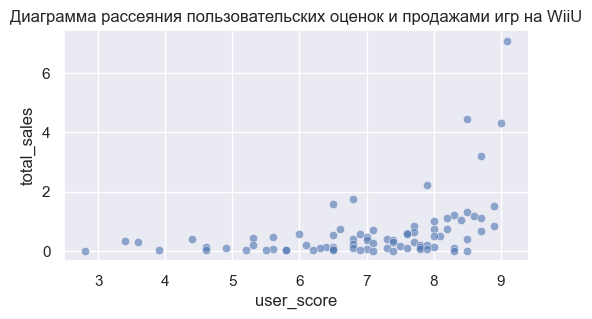

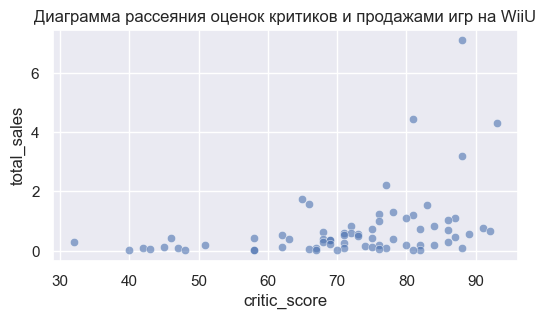

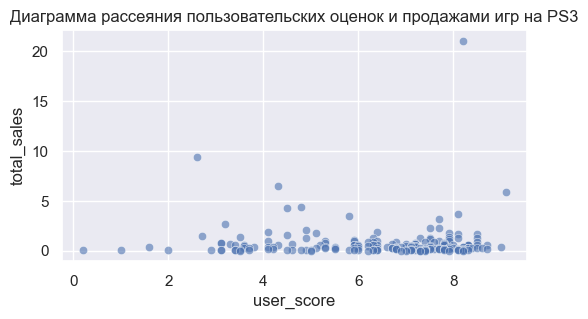

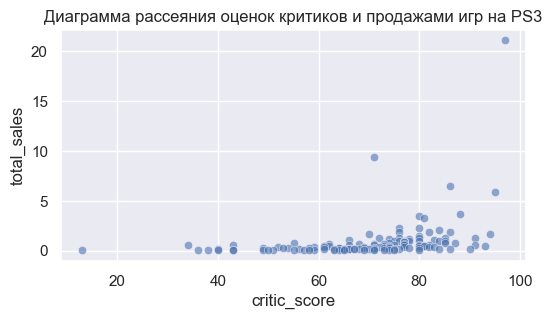

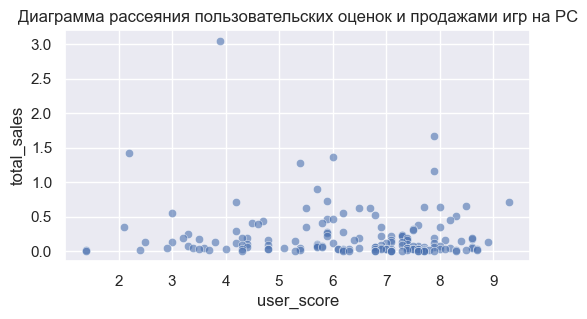

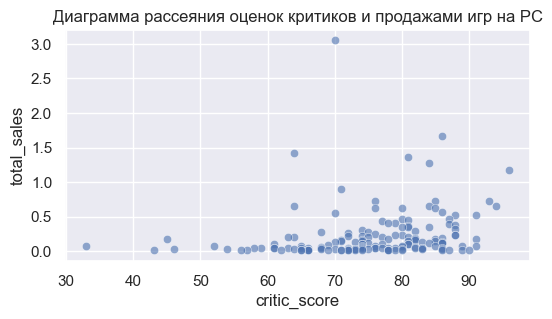

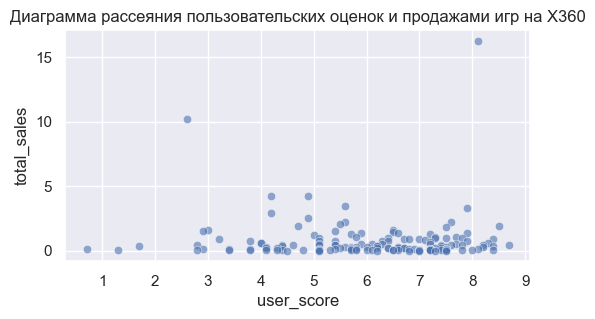

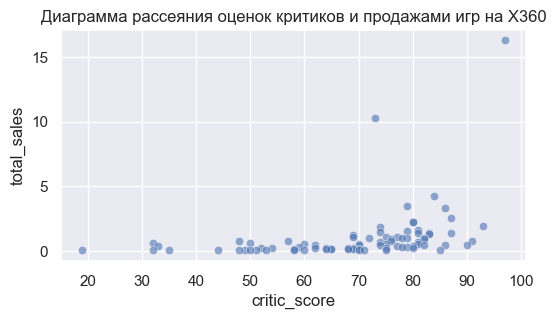

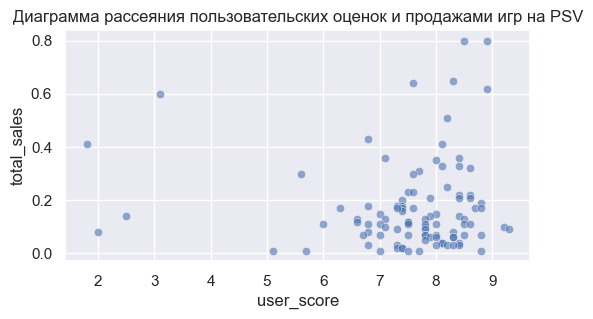

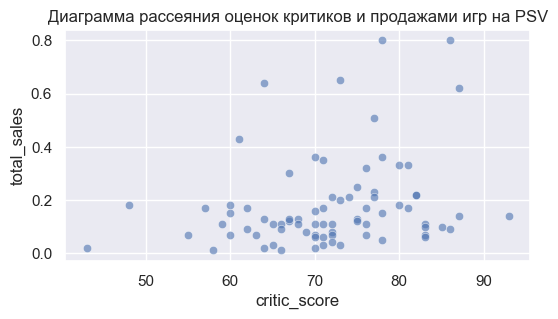

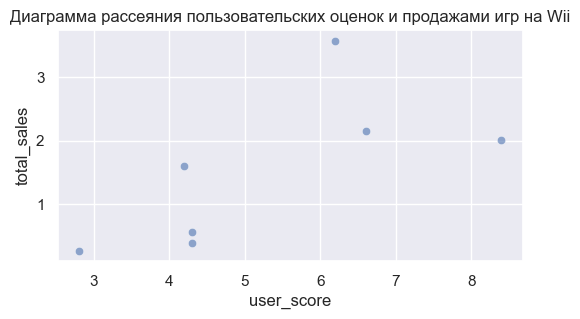

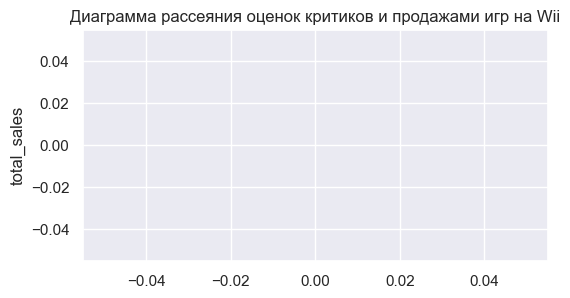

In [50]:
for platform in platforms:
    sns.set(rc={'figure.figsize':(6, 3)})
    sns.scatterplot(data=df_actual[(df_actual.platform == platform)], 
                    x='user_score', 
                    y='total_sales',
                    alpha=0.6).set_title(f'Диаграмма рассеяния пользовательских оценок и продажами игр на {platform}')
    plt.show()
    sns.scatterplot(data=df_actual[(df_actual.platform == platform)], 
                    x='critic_score', 
                    y='total_sales', 
                    alpha=0.6).set_title(f'Диаграмма рассеяния оценок критиков и продажами игр на {platform}')
    plt.show()

Отдельно корреляцию вынесу здесь

In [51]:
df_actual[df_actual.platform == 'PC']['user_score']

73      3.9
157     7.9
184     2.2
196     6.0
208     5.4
       ... 
2168    7.9
2171    1.4
2201    NaN
2205    NaN
2226    7.6
Name: user_score, Length: 189, dtype: float64

In [52]:
for platform in platforms:
    print(
        f'Корреляция продаж на платформы {platform} с оценками пользователей:',
        round(df_actual[df_actual.platform == platform]['user_score']
        .corr(df_actual[df_actual.platform == platform]['total_sales']), 3)
    )
    
    print(
        f'Корреляция продаж на платформы {platform} с оценками критиков:',
        round(df_actual[df_actual.platform == platform]['critic_score']
        .corr(df_actual[df_actual.platform == platform]['total_sales']), 3)
    )
    
    print('---')

Корреляция продаж на платформы PS4 с оценками пользователей: -0.032
Корреляция продаж на платформы PS4 с оценками критиков: 0.407
---
Корреляция продаж на платформы 3DS с оценками пользователей: 0.242
Корреляция продаж на платформы 3DS с оценками критиков: 0.357
---
Корреляция продаж на платформы XOne с оценками пользователей: -0.069
Корреляция продаж на платформы XOne с оценками критиков: 0.417
---
Корреляция продаж на платформы WiiU с оценками пользователей: 0.419
Корреляция продаж на платформы WiiU с оценками критиков: 0.376
---
Корреляция продаж на платформы PS3 с оценками пользователей: 0.002
Корреляция продаж на платформы PS3 с оценками критиков: 0.334
---
Корреляция продаж на платформы PC с оценками пользователей: -0.094
Корреляция продаж на платформы PC с оценками критиков: 0.196
---
Корреляция продаж на платформы X360 с оценками пользователей: -0.012
Корреляция продаж на платформы X360 с оценками критиков: 0.35
---
Корреляция продаж на платформы PSV с оценками пользователей: 0

Оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют

Мнения прессы и игроков могут кардинально различаться: Например, на XOne корреляция оценок критиков около 0.5, а оценок юзеров - минус 0.07. Разница почти в пол-единицы.

Единственная закономерность наблюдается в том, что в нижней правой части на диаграммах точки размещены плотнее относительно всего графика. Отсюда можно сделать вывод, что критики в основном ставят хорошие оценки играм.

<a name="section16"></a>
#### Распределение игр по жанрам

In [53]:
genres = (
    df_actual
    .pivot_table(
        index='genre',
        values='total_sales',
        aggfunc=('sum', 'mean', 'median', 'count'))
    .sort_values(
        by='median',
        ascending=False)
)

genres

,count,mean,median,sum
genre,,,,
Shooter,187,1.245882,0.450,232.98
Sports,208,0.720817,0.250,149.93
Platform,72,0.582500,0.225,41.94
Fighting,79,0.446709,0.130,35.29
Role-Playing,285,0.508281,0.120,144.86
Racing,85,0.469294,0.120,39.89
Misc,146,0.428562,0.115,62.57
Action,752,0.426210,0.110,320.51
Simulation,61,0.353279,0.100,21.55


<Axes: xlabel='genre'>

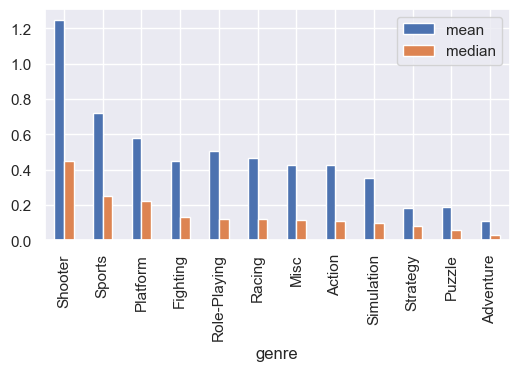

In [54]:
genres = genres.reset_index()
genres.plot(
    kind='bar',
    y=['mean', 'median'],
    x='genre')

***Вывод:***
- Больше всего в отчетный период было выпущено игр жанра `Action`
- Также `Action` игры были больше всего проданы
- Жанр `Shooter` по объему выпускаемого продукта оказался только 5-м, но средний и медианный доход таких игр почти в два раза больше, чем у следующего по выгоде жанра - `Sports`.
- Большой объем и малые продажи делают жанр `Adventure` низкоприбыльным "предприятием"

<a name="section33"></a>
### Портрет пользователя каждого региона (NA, EU, JP)

#### Доля регионов по продажам

       na_sales  eu_sales  jp_sales  other_sales  total_sales
Total    437.14    391.21    137.49       119.81      1085.65
************************************************************
       na_sales  eu_sales  jp_sales  other_sales
Total     40.27     36.03     12.66        11.04


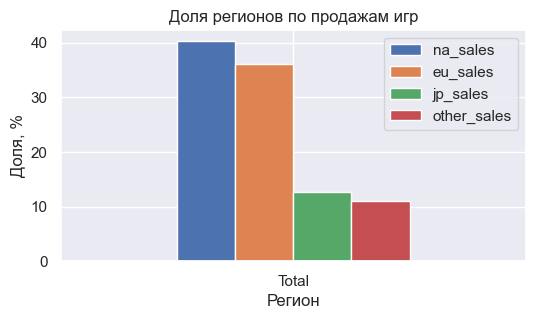

In [55]:
total_region_sales = pd.DataFrame(
    df_actual.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']]
    .sum().sum(axis=0)).T.rename(index={0: 'Total'})

total_region_sales_part = round(
    total_region_sales[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]
    .div(total_region_sales['total_sales'], axis=0) * 100, 2)

print(total_region_sales)
print('*'*60)
print(total_region_sales_part)

total_region_sales_part.plot(kind='bar')

plt.title('Доля регионов по продажам игр')
plt.ylabel('Доля, %')
plt.xlabel('Регион')
plt.xticks(rotation=0)
plt.show()


Больше всего продаж приходится на североамериканский и европейский рынки. Населения в этих регионах больше, чем в Япониии: NA - 370 млн (США+Канада), EU - 750, JP - 125. Также решает платежная способность населения: В США высокая покупательская способность, в Европе же много стран, в которых очень разный уровень дохода.

<a name="section17"></a>
#### Популярные платформы (топ-5)

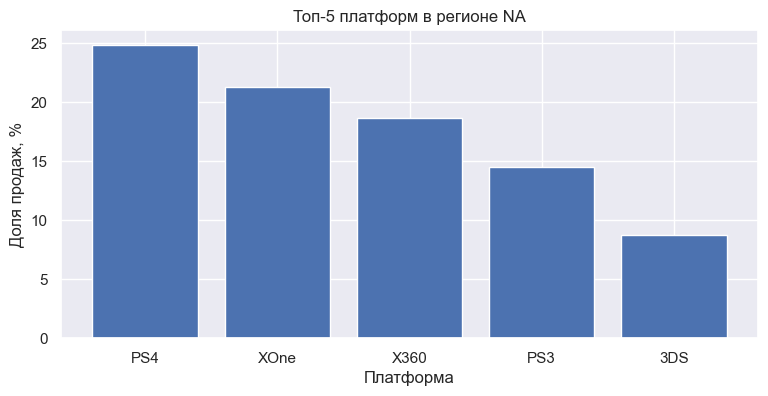

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64
------------------------------


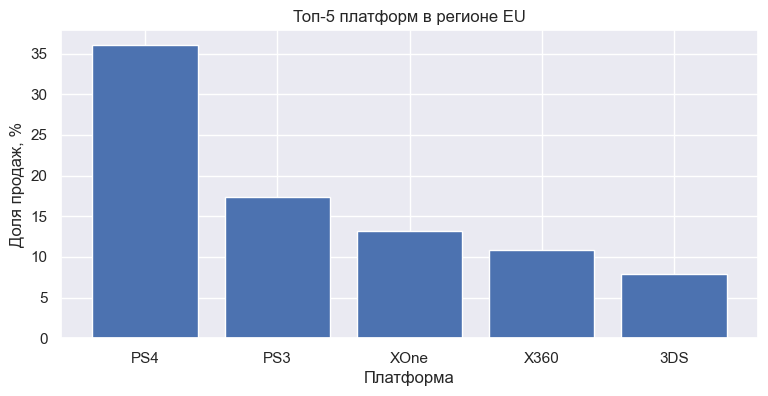

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64
------------------------------


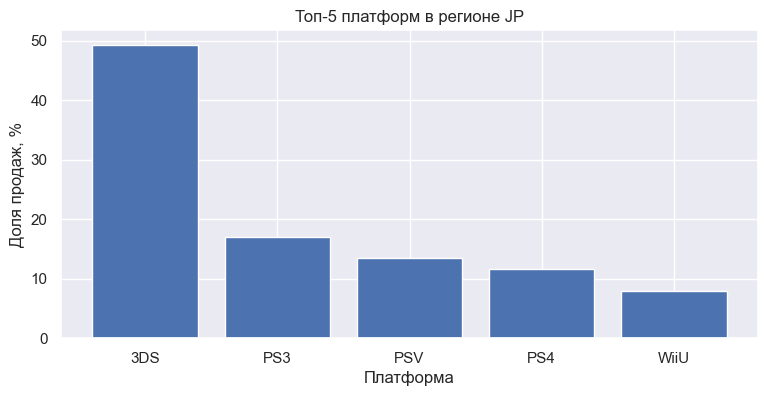

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64
------------------------------


In [56]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    # суммируем продажи по каждой платформе в регионе
    region_sales = df_actual.groupby('platform')[region].sum().sort_values(ascending=False)
    # суммируем общие продажи по регионам
    totals = region_sales.sum()
    # узнаем долю каждой платформы в каждом регионе
    region_sales_part = region_sales.divide(totals) * 100
    # выводим на график топ-5 платформ
    region_sales_top = region_sales_part.head()
    # выводим текстом
    
    
    
    
    # выводим диаграмму для региона
    plt.figure(figsize=(9,4))
    plt.bar(region_sales_top.index, region_sales_top.values)
    plt.title(f'Топ-5 платформ в регионе {region[:2].upper()}')
    plt.xlabel('Платформа')
    plt.ylabel('Доля продаж, %')
    #plt.text(2, max(region_sales_top.values) * 0.9, f'Общие продажи на регион: {totals:.2f} M', fontdict={'weight': 'bold'})
    plt.show()
    print(region_sales.head())
    print('------------------------------')

Около 25% продаж Североамериканского рынка приходятся на платформу PS4, XOne немного отстает (~21%). X360, 3DS, PS3 - входят в пятерку лидеров по продажам в Северной Америке.

На Европейском рынке PS4 занимает значительно больший процент рынка, чем на Североамериканском, который составляет ~36%. На втором месте расположилась консоль прошлого поколения - PS3. Видно, в Европе ценят консоли Sony. Также высоки продажи XOne, PC и 3DS.

3DS занимает почти половину японского рынка. PS4, PSV, PS3, WiiU входят в пятерку лидеров.

В Северной Америке и Европе топ-5 платформ одни и те же, как и топ-1. В отличии от Японии: там половину рынка держит "карманная"консоль, и в топе встречаются другие платформы.

<a name="section18"></a>
#### Популярные жанры (топ-5)

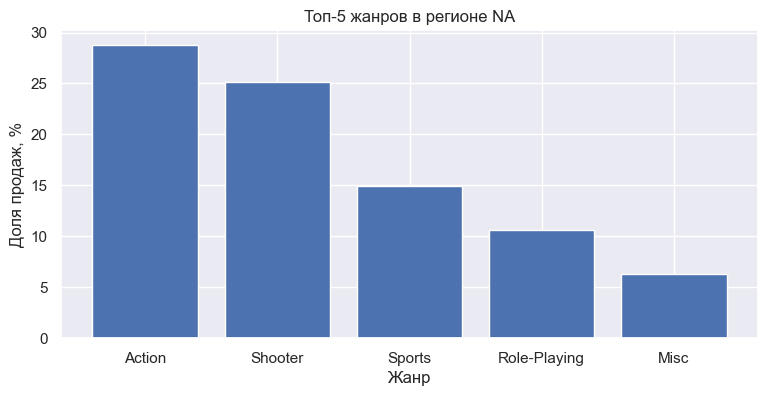

genre
Action          125.83
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.46
Name: na_sales, dtype: float64
------------------------------


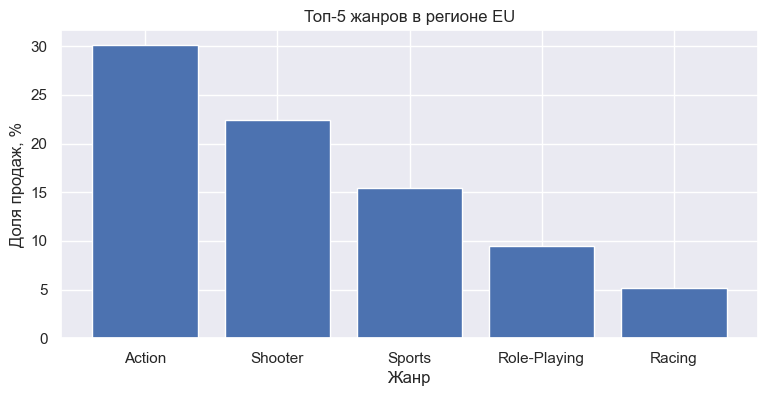

genre
Action          117.87
Shooter          87.86
Sports           60.34
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64
------------------------------


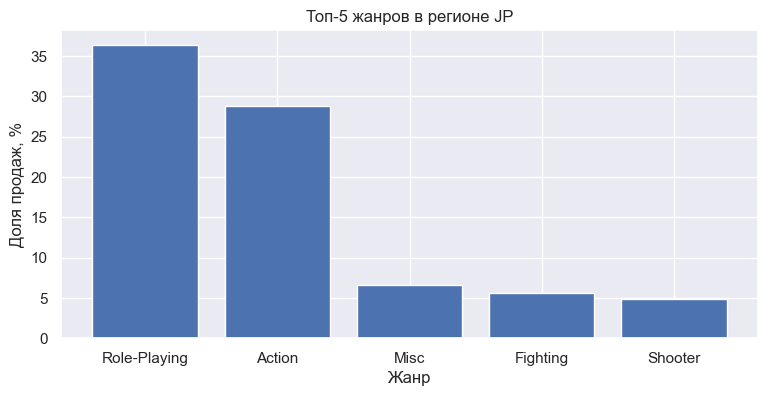

genre
Role-Playing    50.01
Action          39.65
Misc             9.03
Fighting         7.63
Shooter          6.61
Name: jp_sales, dtype: float64
------------------------------


In [57]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    region_sales = df_actual.groupby('genre')[region].sum().sort_values(ascending=False)
    totals = region_sales.sum()
    region_sales_part = region_sales.divide(totals) * 100
    region_sales_top = region_sales_part.head()
    

    
    # выводим диаграмму для региона
    plt.figure(figsize=(9,4))
    plt.bar(region_sales_top.index, region_sales_top.values)
    plt.title(f'Топ-5 жанров в регионе {region[:2].upper()}')
    plt.xlabel('Жанр')
    plt.ylabel('Доля продаж, %')
    #plt.text(2.4, max(region_sales.values) * 0.9, f'Общие продажи на регион: {totals:.2f} M', fontdict={'weight': 'bold'})
    plt.show()
    print(region_sales.head())
    print('------------------------------')

Европа и Северная Америка вновь проявили похожий вкус (разница в культурах минимальна): топовые жанры - Action и Shooter. В Японии же отдают предпочтение Role-Playing

<a name="section19"></a>
#### Влияние ESRB на продажи в отдельном регионе

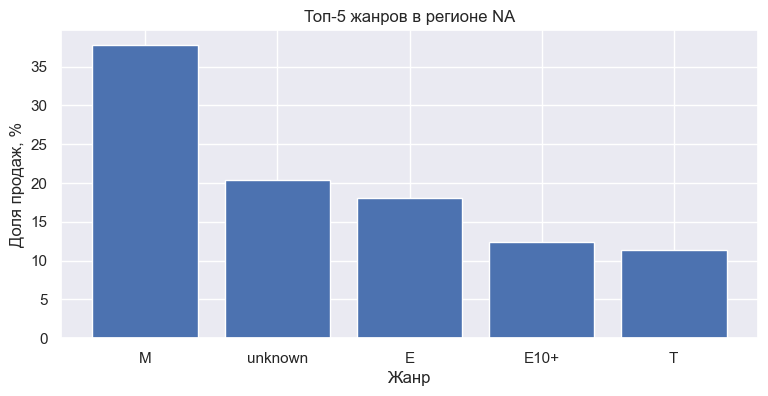

rating
M          165.21
unknown     89.18
E           78.94
E10+        54.02
T           49.79
Name: na_sales, dtype: float64
------------------------------


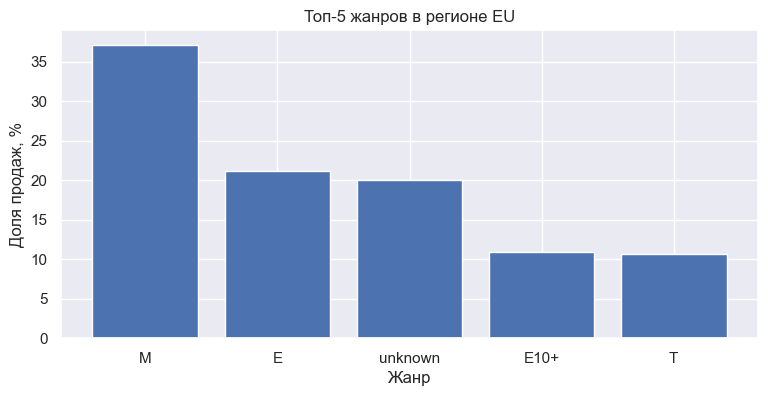

rating
M          145.32
E           82.80
unknown     78.61
E10+        42.53
T           41.95
Name: eu_sales, dtype: float64
------------------------------


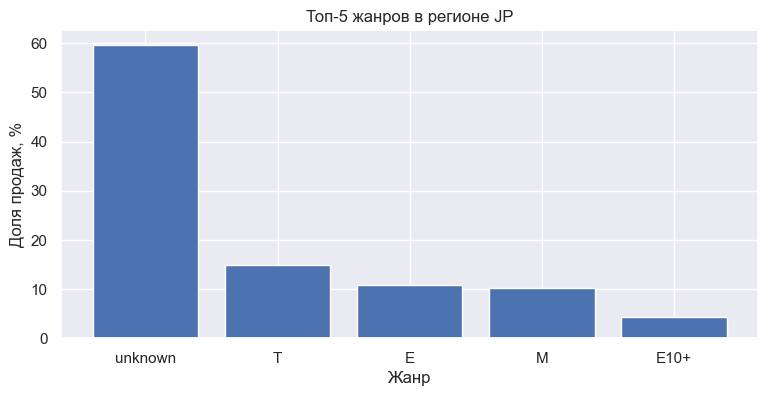

rating
unknown    82.05
T          20.44
E          15.00
M          14.11
E10+        5.89
Name: jp_sales, dtype: float64
------------------------------


In [58]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    region_sales = df_actual.groupby('rating')[region].sum().sort_values(ascending=False)
    totals = region_sales.sum()
    region_sales_part = region_sales.divide(totals) * 100
    region_sales_top = region_sales_part.head()

    
    # выводим диаграмму для региона
    plt.figure(figsize=(9,4))
    plt.bar(region_sales_top.index, region_sales_top.values)
    plt.title(f'Топ-5 жанров в регионе {region[:2].upper()}')
    plt.xlabel('Жанр')
    plt.ylabel('Доля продаж, %')
    plt.show()
    print(region_sales.head())
    print('------------------------------')

Распределение продаж игр с рейтингом по Европе и Северной Америке практически идентично (вновь). Большинство жителей этих регионов предпочитают игры для взрослой аудитории с рейтингом М. В около 20% случаев, как в Европе, так и в Америке, рейтинг игр неизвестен.

В Японии около 60% покупок игр не имеют указания рейтинга, возможно это связано с другой системой маркировки игр в этом регионе. Самым популярным рейтингом является Т, предназначенный для подростков от 13 лет.

<a name="section44"></a>
### Проверка гипотез

<a name="section20"></a>
#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H0 - рейтинги Xbox One и PC **одинаковые**

H1 - рейтинги Xbox One и PC **не одинаковые**

Уровень значимости - 5%

Для проверки гипотезы о равенстве средних значений двух независимых выборок можно воспользоваться тестом Стьюдента (scipy.stats.ttest_ind). Данный тест позволяет узнать, отличаются ли средние значения выборок от ожидаемых.

In [59]:
user_score_XOne = df_actual[df_actual.platform == 'XOne']['user_score'].dropna()
user_score_XOne.head()

22    7.9
24    5.4
31    6.4
39    6.2
55    4.1
Name: user_score, dtype: float64

In [60]:
user_score_PC = df_actual[df_actual.platform == 'PC']['user_score'].dropna()
user_score_PC.head()

73     3.9
157    7.9
184    2.2
196    6.0
208    5.4
Name: user_score, dtype: float64

In [61]:
alpha = .05
results = st.ttest_ind(user_score_XOne, user_score_PC, equal_var=False)
print('p-значение:', results.pvalue)

p-значение: 0.14759594013430463


In [62]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


***Вывод:*** Средние пользовательские рейтинги двух выборок по платформам XOne и PC равны.

<a name="section21"></a>
#### Средние пользовательские рейтинги жанров Action и Sports разные

H0 - рейтинги жанров Action и Sports **одинаковые**

H1 - рейтинги жанров Action и Sports **не одинаковые**

Уровень значимости - 5%

Для проверки гипотезы о равенстве средних значений двух независимых выборок можно воспользоваться тестом Стьюдента (scipy.stats.ttest_ind). Данный тест позволяет узнать, отличаются ли средние значения выборок от ожидаемых.

In [63]:
user_score_Action = df_actual[df_actual.genre == 'Action']['user_score'].dropna()
user_score_Action.head()

0     8.2
1     8.1
4     8.3
20    9.1
22    7.9
Name: user_score, dtype: float64

In [64]:
user_score_Sports = df_actual[df_actual.genre == 'Sports']['user_score'].dropna()
user_score_Sports.head()

9     4.3
12    5.0
18    4.3
19    5.7
38    4.5
Name: user_score, dtype: float64

In [65]:
alpha = .05
results = st.ttest_ind(user_score_Action, user_score_Sports, equal_var=False)
print('p-значение:', results.pvalue)

p-значение: 2.419141451747253e-20


In [66]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


***Вывод:*** Средние пользовательские рейтинги двух выборок по жанрам Action и Sports отличаются.

<a name="section22"></a>
### Общий вывод:

Глобально, сейчас рынок компьютерных игр переживает стагнацию и в ближайшей восходящего тренда не предвидится. Но точки роста имеются:
 - Только две платформы продолжают показывать рост - PS4 и Xbox One. Этим консолям только 3 года, пик продаж игр достигает на 5 год после релиза - восходящий тренд продаж на эти устройства будет продолжаться. Стоит заострить внимание на плафторму от Sony: игры для этой консоли очень популярны в США (108 млн проданных игр) и особенно в Европе (140 млн).
 - Судя по возрастной маркировке `M` (для взрослых), основной контингент размером по 35+% от всей аудитории из Северной Америке и Европе - взрослые люди, которые сами по себе являются самым платящим сегментом. Не все игры, релиз которых был ограничен Японией, получили оценку от ESRB, поэтому сложно назвать какой возрастной сегмент там может преобладать.
 - Типичный пользователь из EU и NA регионов предпочитает игры жанров `Action`, `Shooter`, `Sports` (жанры упомянуты по мере убывания популярности). Вкус японских геймеров отличается - топ-1 занимает `Role-Playing`.
 - В продолжении темы о жанрах: на одну `Shooter` игру приходится в среднем 1.2+ млн проданных копий и 450 тыс медианно - это самые высокие показатели среди всех популярных жанров. Например, у топ-2, `Sports`, среднее число проданных копий 700 тыс, медианная - 250 тыс. Немаленький объем (~200 изданий игр) и малые продажи делают жанр `Adventure` низкоприбыльным "предприятием": средняя - 100 тыс., медианная - 30 тыс.
 - Оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют.
 - По многим параметрам, такие как популярные платформы и жанры, пользователи из Северной Америки и Европы очень схожи, поэтому их можно объединить в категорию "западного" рынка. А этот западный рынок имеет долю примерно в 75% от общемирового.
 
Стоит вкладываться в игры с возрастным рейтингом `M` жанра `Shooter` для консолей `PlayStation 4` и `Xbox One`, которые будут издаваться на западном рынке - этот вариант самый многообещающе прибыльный.